# 4장 Matplotlib을 활용한 시작화

## <u>텍스트와 주석</u>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

### 예제: 미국 출생률에 휴일이 미치는 영향

In [4]:
births = pd.read_csv('/Users/chosikc/Sites/PythonDataHandbook/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format = '%Y%m%d')
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

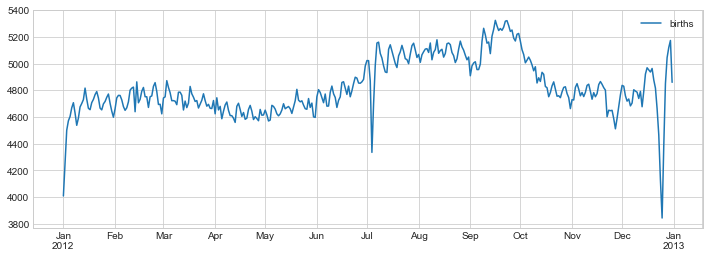

In [5]:
fig, ax = plt.subplots(figsize = (12, 4)) 
births_by_date.plot(ax=ax);

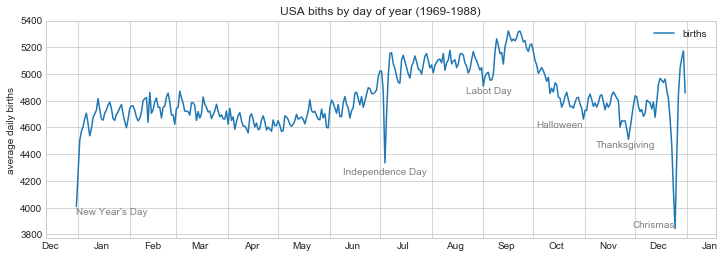

In [6]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# 플롯에 레이블 추가
style = dict(size = 10, color = 'gray')

ax.text('2012-1-1',   3950, "New Year's Day",                   **style)
ax.text('2012-7-4',   4250, "Independence Day", ha = 'center' , **style)
ax.text('2012-9-4',   4850, "Labot Day",        ha = 'center' , **style)
ax.text('2012-10-31', 4600, "Halloween" ,       ha = 'right',   **style)
ax.text('2012-11-25', 4450, "Thanksgiving" ,    ha = 'center',  **style)
ax.text('2012-12-25', 3850, "Chrismas" ,        ha = 'right',   **style)

#축에 레리블 추가
ax.set(title ='USA biths by day of year (1969-1988)', ylabel = 'average daily births')

#중앙 정렬한 월 레이블로 x축의 포멧 지정
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));



### 변환 및 텍스트 위치

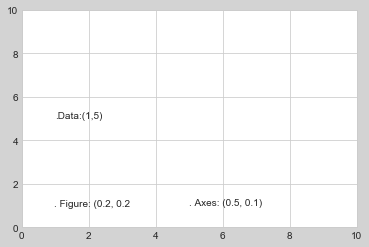

In [7]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform = ax.transData가 기본값이지만 그래도 직접 지정 
ax.text(1,5, ".Data:(1,5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2", transform=fig.transFigure);

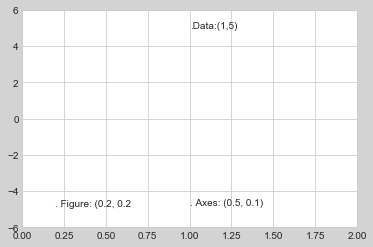

In [8]:
ax.set_xlim(0,2)
ax.set_ylim(-6,6)
fig

### 화살표와 주석

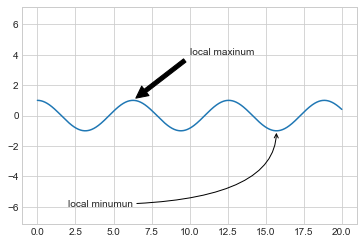

In [11]:
%matplotlib inline
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maxinum', xy=(6.28, 1), xytext=(10, 4), 
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('local minumun', xy=(5 * np.pi, -1), xytext=(2, -6), 
            arrowprops=dict(arrowstyle="->", 
            connectionstyle="angle3, angleA=0, angleB=-90"));

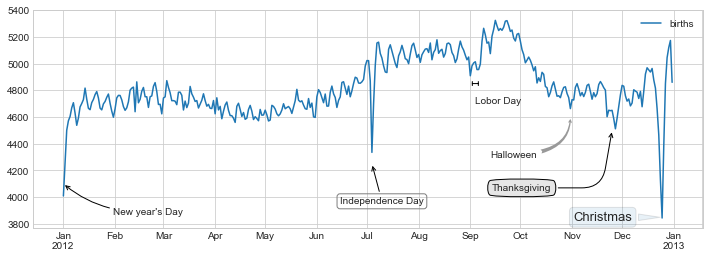

In [12]:
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

#플롯에 레이블 추가

ax.annotate("New year's Day",
            xy=('2012-1-1', 4100), 
            xycoords='data', 
            xytext=(50, -30), 
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day",
            xy=('2012-7-4', 4250), 
            xycoords='data', 
            bbox=dict(boxstyle='round',fc="none", ec="gray"),
            xytext=(10, -40), 
            textcoords='offset points',
            ha = 'center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate("Lobor Day", 
            xy=('2012-9-4', 4850),
            xycoords='data',
            xytext=(0, -20),
            textcoords='offset points')
ax.annotate("", 
           xy=('2012-9-1', 4850),
           xytext=('2012-9-7', 4850),
           xycoords='data', 
           textcoords='data',
           arrowprops={'arrowstyle': '|-|, widthA=0.2, widthB=0.2', })

ax.annotate("Halloween",
           xy=('2012-10-31', 4600),
           xycoords='data',
           xytext=(-80, -40),
           textcoords='offset points',
           arrowprops = dict(arrowstyle="fancy", fc="0.6", ec="none", connectionstyle="angle3, angleA=0, angleB=-90"))

ax.annotate('Thanksgiving',
            xy=('2012-11-25', 4500), 
            xycoords='data',            
            xytext=(-120, -60), 
            textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=80,rad=20"))

ax.annotate('Christmas',
           xy=('2012-12-25', 3850),
           xycoords='data',
           xytext=(-30, 0),
           textcoords='offset points',
           size = 13, 
           ha = 'right',
           va = 'center',
           bbox = dict(boxstyle="round", alpha=0.1),
           arrowprops = dict(arrowstyle="wedge,tail_width=0.5", alpha = 0.1));